# Accès aléatoire à un arbre <br>binaire de recherche

## Principe 

Le but de cette section est d'accéder aléatoirement aux éléments qui sont stockés triés dans l'arbre.

Pour cela, nous allons écrire les fonctions 

In [1]:
def element_d_indice_n(R,n): return # noeud  

qui retourne le $(n+1)^{ieme}$ élément de plus petite clef de l'arbre, et 

In [2]:
def indice_de_l_element(R,val): return # entier 

qui cherche l'élément de clef `val` et retourne son indice, i.e. le nombre d'éléments ayant de plus petites clefs que lui dans l'arbre. 

## Taille d'un sous-arbre

Pour pouvoir mettre en oeuvre ces fonctions efficacement, il faut **ajouter un attribut** stockant la **taille des sous-arbres** dont ils sont la racine **à chaque noeud**. 

Pour rappel, la taille de l'arbre dont `R` est la racine peut être calculée récursivement pour tout arbre binaire via

In [3]:
def taille(R):
    if R:
        return taille(R.gauche) + taille(R.droite) + 1
    else: # arbre vide
        return 0

La structure des noeuds avec cet attribut supplémentaire est donc 

In [4]:
class Noeud:
    def __init__(self,valeur):
        self.clef = valeur
        self.gauche = None
        self.droite = None
        self.taille = 1
        
    def __str__(self): return "{}".format(self.clef)

Elle permet de simplifier la fonction `taille`

In [5]:
def taille(R):
    return R.taille if R else 0

Mais il est nécessaire de maintenir les attributs `taille` à jour quand une fonction les modifie via 

In [6]:
def recalculer_taille(R):
    R.taille = taille(R.gauche) + taille(R.droite) + 1

Typiquement, on le fait en retour de récursion, quand on sait si un élément a été ajouté/retiré. L'insertion devient 

In [7]:
def inserer(R,val):
    
    if R == None:       R = Noeud(val)
    elif val < R.clef:  R.gauche = inserer(R.gauche,val)
    elif val > R.clef:  R.droite = inserer(R.droite,val) 
    else:               pass
    
    recalculer_taille(R)
    return R

In [8]:
import include.helpers as h

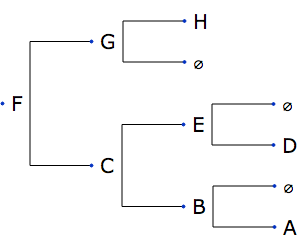

In [9]:
T = [ 'F', 'C', 'B', 'E', 'A', 'G', 'H', 'D' ]; R = None
for t in T: R = inserer(R,t)
h.afficher_arbre_binaire(R)

# Quelles sont les tailles des noeuds de l'arbre ?

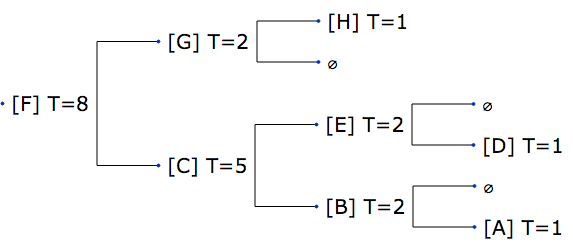

In [10]:
def afficher_clef_et_taille(R):
    return "[{}] T={}".format(R.clef,R.taille)
Noeud.__str__ = afficher_clef_et_taille
h.afficher_arbre_binaire(R)

## Element d'indice n

On cherche l'élément qui a `n` éléments dans l'arbre plus petits que lui. 

Partant de la racine `R`, on compare cette valeur `n` au nombre d'éléments stockés dans le sous-arbre gauche, soit `t = taille(R.gauche)`. Il y a trois possibilités

* `n == t`, on a trouvé l'élément cherché.


* `n < t`, l'élément cherché est celui d'indice `n` dans le sous-arbre gauche


* `n > t`, l'élément cherché est dans le sous-arbre droit. Comme il y a `t` éléments dans le sous-arbre gauche et `1` dans la racine R, il sera d'indice `n-t-1` dans le sous-arbre droit 

la fonction s'écrit donc 

In [34]:
def element_d_indice_n(R,n):
    if n < 0 or n >= taille(R): raise IndexError()
    
    t = taille(R.gauche)
    print("{}, t={}, n={}".format(R,t,n))
    if n == t:
        return R
    elif n < t:
        return element_d_indice_n(R.gauche,n)
    else: # n > t
        return element_d_indice_n(R.droite,n-t-1)

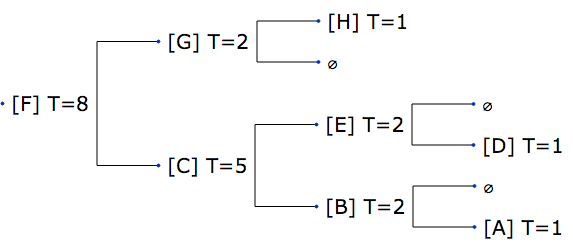

In [44]:
h.afficher_arbre_binaire(R)

# Quel est l'élément d'indice 4 ?

In [46]:
print(element_d_indice_n(R,4))

[F] T=8, t=5, n=4
[C] T=5, t=2, n=4
[E] T=2, t=1, n=1
[E] T=2


## Indice de l'élément de clef `val`

Cette fonction est l'inverse de la précédente. 

On cherche une clef, et donc les tests sont identiques à ceux de la fonction `chercher` vue précédemment:

* `val < R.clef`
* `val == R.clef`
* `val > R.clef`.

La différence réside dans la valeur retournée. 

* `chercher` retournait un noeud
* `indice_de_l_element` retourne un entier, le nombre d'éléments plus petits que `val`. 

* si `val == R.clef`, les éléments plus petits que `val` sont tous les éléments du sous-arbre gauche. Il y en a `taille(R.gauche)`.


* si `val < R.clef`, racine et sous-arbre droit sont `> val`. L'élément de clef `val` et les éléments plus petits que lui sont tous dans le sous-arbre gauche. 


* si `val > R.clef`, racine et sous-arbre droit sont `< val`. On a donc déjà trouvé `taille(R.gauche) + 1` éléments plus petits. Reste à explorer le sous-arbre droit. 

La fonction d'écrit dont 

In [68]:
def indice_de_l_element(R,val):
    if R == None: raise Exception("pas trouvé")

    t = taille(R.gauche)
    if val == R.clef:
        indice = t
    elif val < R.clef:
        indice = indice_de_l_element(R.gauche,val)
    else: # val > R.clef
        indice = indice_de_l_element(R.droite,val) + t + 1 
    
    print("{}, t={}, i={}".format(R,t,indice))
    return indice

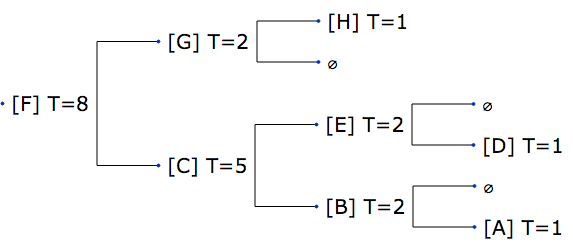

In [69]:
h.afficher_arbre_binaire(R)

# Quel est l'indice de l'élément de clé 'E' ?

In [70]:
print(indice_de_l_element(R,'E'))

[E] T=2, t=1, i=1
[C] T=5, t=2, i=4
[F] T=8, t=5, i=4
4


<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>